In [21]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import tkinter as tk
from tkinter import *

# load the data
df = pd.read_excel("C:/Users/satk8/Desktop/dataset.xlsx",index_col=0)

# preprocess the text data
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [stemmer.stem(token) for token in tokens]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)
# apply to dataframe
df['Search Query'] = df['Search Query'].apply(preprocess)
df['Clicked Result'] = df['Clicked Result'].apply(preprocess)

# convert gender values to numerical
df['Gender'] = df['Gender'].apply(lambda x: 1 if x.lower() == 'female' else 0)

# convert the preprocessed text into numerical data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Search Query'])
X = X.toarray() # convert sparse matrix to dense array
y = df['Gender'].values

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the neural network architecture
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=30)

# train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stop])

# define a function to make predictions on user input
def predict_gender(search_query):
    search_query = preprocess(search_query)
    new_data = [search_query]
    new_data = vectorizer.transform(new_data)
    new_data = new_data.toarray()
    prediction = model.predict(new_data)[0][0]
    if prediction > 0.5:
        return "female"
    else:
        return "male"

# define the GUI function
def create_gui():
    # create the main window
    root = tk.Tk()
    root.title("Gender Prediction")
    
    # define the labels and entry widgets
    search_query_label = tk.Label(root, text="Enter a search query:")
    search_query_entry = tk.Entry(root, width=50)
    prediction_label = tk.Label(root, text="")
    similar_words_label = tk.Label(root, text="")
    
    # define the predict function
    def predict():
        # get the search query entered by the user
        search_query = search_query_entry.get()

        # preprocess the search query text
        preprocessed_search_query = preprocess(search_query)

        # convert the preprocessed text into numerical data using TfidfVectorizer
        vectorized_search_query = vectorizer.transform([preprocessed_search_query]).toarray()

        # make a prediction using the trained neural network
        prediction = model.predict(vectorized_search_query)[0][0]

        # convert the prediction to a binary label
        binary_prediction = 1 if prediction > 0.5 else 0

        # display the prediction result
        if binary_prediction == 1:
            prediction_label.config(text="The model predicted that the user who searched for '{}' is female ({}%).".format(search_query, round(prediction * 100, 3)))
        else:
            prediction_label.config(text="The model predicted that the user who searched for '{}' is male ({}%).".format(search_query, round((1 - prediction) * 100, 3)))

        # get the similar words from the database
        similar_words = df[df['Search Query'] == search_query]['Clicked Result'].values

        # display the similar words
        similar_words_label.config(text="Similar words: {}".format(', '.join(similar_words)))
    
    # create a predict button
    predict_button = tk.Button(root, text="Predict gender", command=predict)
    predict_button.pack()

    # create a search query label and entry
    search_query_label.pack()
    search_query_entry.pack()

    # create a prediction label
    prediction_label.pack()

    # create a similar words label
    similar_words_label.pack()
    
    # bind the enter key to the predict function
    search_query_entry.bind("<Return>", predict)

    # run the tkinter event loop
    root.mainloop()

if __name__ == "__main__":
    create_gui()

Epoch 1/100
38/38 [==============================] - 2s 11ms/step - loss: 0.6916 - accuracy: 0.5066 - val_loss: 0.6805 - val_accuracy: 0.6974
Epoch 2/100
38/38 [==============================] - 0s 6ms/step - loss: 0.6708 - accuracy: 0.6530 - val_loss: 0.6467 - val_accuracy: 0.7303
Epoch 3/100
38/38 [==============================] - 0s 6ms/step - loss: 0.5903 - accuracy: 0.7878 - val_loss: 0.5339 - val_accuracy: 0.7829
Epoch 4/100
38/38 [==============================] - 0s 7ms/step - loss: 0.4230 - accuracy: 0.8289 - val_loss: 0.4694 - val_accuracy: 0.7763
Epoch 5/100
38/38 [==============================] - 0s 6ms/step - loss: 0.3059 - accuracy: 0.8750 - val_loss: 0.5060 - val_accuracy: 0.7697
Epoch 6/100
38/38 [==============================] - 0s 6ms/step - loss: 0.2355 - accuracy: 0.9030 - val_loss: 0.5480 - val_accuracy: 0.7566
Epoch 7/100
38/38 [==============================] - 0s 6ms/step - loss: 0.2056 - accuracy: 0.9145 - val_loss: 0.6194 - val_accuracy: 0.7303
Epoch 8/100


In [18]:
X_train.shape

(608, 438)

In [19]:
X_test.shape

(152, 438)

In [15]:
# Countvectorizer
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Load the data
df = pd.read_excel("C:/Users/satk8/Desktop/dataset.xlsx",index_col=0)

# Preprocess the text data
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [stemmer.stem(token) for token in tokens]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)
    
df['Search Query'] = df['Search Query'].apply(preprocess)
df['Clicked Result'] = df['Clicked Result'].apply(preprocess)

# Convert gender values to numerical
df['Gender'] = df['Gender'].apply(lambda x: 1 if x.lower() == 'female' else 0)

# Convert the preprocessed text into numerical data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Search Query'])
X = X.toarray() # convert sparse matrix to dense array
y = df['Gender'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=15)

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Epoch 1/100
9/9 [==============================] - 1s 27ms/step - loss: 0.6911 - accuracy: 0.4962 - val_loss: 0.6880 - val_accuracy: 0.5152
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6803 - accuracy: 0.5644 - val_loss: 0.6827 - val_accuracy: 0.5303
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6725 - accuracy: 0.6136 - val_loss: 0.6769 - val_accuracy: 0.5758
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6568 - accuracy: 0.7045 - val_loss: 0.6681 - val_accuracy: 0.6515
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6384 - accuracy: 0.7462 - val_loss: 0.6516 - val_accuracy: 0.6970
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6116 - accuracy: 0.7500 - val_loss: 0.6281 - val_accuracy: 0.7121
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5722 - accuracy: 0.7955 - val_loss: 0.5932 - val_accuracy: 0.7424
Epoch 8/100
9/9 [=========

In [23]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

3/3 [==============================] - 0s 5ms/step - loss: 1.1266 - accuracy: 0.6786
Accuracy: 67.86%


In [41]:
# Predict on a new dataset
new_data = ['K']
new_data = vectorizer.transform(new_data)
new_data = new_data.toarray()
predictions = model.predict(new_data)

# Convert predictions to binary labels
binary_predictions = [1 if prediction > 0.5 else 0 for prediction in predictions]

# Count number of male and female predictions
num_male = binary_predictions.count(0)
num_female = binary_predictions.count(1)

# Print results
print("Number of male predictions: {}".format(num_male))
print("Number of female predictions: {}".format(num_female))

# Conclude
if num_male > num_female:
    print("The model predicted that the majority of users who clicked on the search results were male.")
elif num_female > num_male:
    print("The model predicted that the majority of users who clicked on the search results were female.")
else:
    print("The model predicted an equal number of male and female users who clicked on the search results.")

1/1 [==============================] - 0s 13ms/step
Number of male predictions: 0
Number of female predictions: 1
The model predicted that the majority of users who clicked on the search results were female.


In [21]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict the labels for the testing set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

3/3 [==============================] - 0s 4ms/step
Confusion Matrix:
[[40 15]
 [12 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        55
           1       0.53      0.59      0.56        29

    accuracy                           0.68        84
   macro avg       0.65      0.66      0.65        84
weighted avg       0.69      0.68      0.68        84



In [22]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict the labels for the testing set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

3/3 [==============================] - 0s 2ms/step
Confusion Matrix:
[[40 15]
 [12 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        55
           1       0.53      0.59      0.56        29

    accuracy                           0.68        84
   macro avg       0.65      0.66      0.65        84
weighted avg       0.69      0.68      0.68        84



In [33]:
# TF-IDF
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Load the data
df = pd.read_excel("C:/Users/satk8/Desktop/dataset.xlsx",index_col=0)

# Preprocess the text data
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [stemmer.stem(token) for token in tokens]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)
    
df['Search Query'] = df['Search Query'].apply(preprocess)
df['Clicked Result'] = df['Clicked Result'].apply(preprocess)

# Convert gender values to numerical
df['Gender'] = df['Gender'].apply(lambda x: 1 if x.lower() == 'female' else 0)

# Convert the preprocessed text into numerical data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Search Query'])
X = X.toarray() # convert sparse matrix to dense array
y = df['Gender'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=30)

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stop])

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Epoch 1/100
17/17 [==============================] - 1s 12ms/step - loss: 0.6927 - accuracy: 0.5227 - val_loss: 0.6872 - val_accuracy: 0.5303
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5379 - val_loss: 0.6822 - val_accuracy: 0.5303
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.5606 - val_loss: 0.6714 - val_accuracy: 0.5455
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6578 - accuracy: 0.5909 - val_loss: 0.6521 - val_accuracy: 0.6515
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6209 - accuracy: 0.6932 - val_loss: 0.6143 - val_accuracy: 0.6970
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5615 - accuracy: 0.8220 - val_loss: 0.5544 - val_accuracy: 0.7121
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4462 - accuracy: 0.8712 - val_loss: 0.4794 - val_accuracy: 0.7576
Epoch 8/100


In [11]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import tkinter as tk
from tkinter import *

# Load the data
df = pd.read_excel("C:/Users/satk8/Desktop/dataset.xlsx",index_col=0)

# Preprocess the text data
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [stemmer.stem(token) for token in tokens]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

df['Search Query'] = df['Search Query'].apply(preprocess)
df['Clicked Result'] = df['Clicked Result'].apply(preprocess)

# Convert gender values to numerical
df['Gender'] = df['Gender'].apply(lambda x: 1 if x.lower() == 'female' else 0)

# Convert the preprocessed text into numerical data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Search Query'])
X = X.toarray() # convert sparse matrix to dense array
y = df['Gender'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=30)

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stop])

# Define a function to make predictions on user input
def predict_gender(search_query):
    search_query = preprocess(search_query)
    new_data = [search_query]
    new_data = vectorizer.transform(new_data)
    new_data = new_data.toarray()
    prediction = model.predict(new_data)[0][0]
    if prediction > 0.5:
        return "female"
    else:
        return "male"

# Define the GUI function
def create_gui():
    # Create the main window
    root = tk.Tk()
    root.title("Gender Prediction")
    
    # Define the labels and entry widgets
    search_query_label = tk.Label(root, text="Enter a search query:")
    search_query_entry = tk.Entry(root, width=50)
    prediction_label = tk.Label(root, text="")
    
    # Define the predict function
def predict():
    # Get the search query entered by the user
    search_query = search_query_entry.get()

    # Preprocess the search query text
    preprocessed_search_query = preprocess(search_query)

    # Convert the preprocessed text into numerical data using TfidfVectorizer
    vectorized_search_query = vectorizer.transform([preprocessed_search_query]).toarray()

    # Make a prediction using the trained neural network
    prediction = model.predict(vectorized_search_query)

    # Convert the prediction to a binary label
    binary_prediction = 1 if prediction > 0.5 else 0

    # Display the prediction result
    if binary_prediction == 1:
        result_label.config(text="The model predicted that the user who searched for '{}' is female.".format(search_query))
    else:
        result_label.config(text="The model predicted that the user who searched for '{}' is male.".format(search_query))


# Create a tkinter window
window = Tk()
window.title("Gender Prediction App")

# Create a search query label and entry
search_query_label = Label(window, text="Enter your search query:")
search_query_label.pack()
search_query_entry = Entry(window)
search_query_entry.pack()

# Create a predict button
predict_button = Button(window, text="Predict gender", command=predict)
predict_button.pack()

# Create a result label
result_label = Label(window, text="")
result_label.pack()

# Run the tkinter event loop
window.mainloop()

Epoch 1/100
17/17 [==============================] - 2s 24ms/step - loss: 0.6960 - accuracy: 0.4340 - val_loss: 0.6915 - val_accuracy: 0.5224
Epoch 2/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6858 - accuracy: 0.6038 - val_loss: 0.6849 - val_accuracy: 0.6418
Epoch 3/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6747 - accuracy: 0.6755 - val_loss: 0.6740 - val_accuracy: 0.6866
Epoch 4/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6471 - accuracy: 0.7396 - val_loss: 0.6473 - val_accuracy: 0.6866
Epoch 5/100
17/17 [==============================] - 0s 7ms/step - loss: 0.5907 - accuracy: 0.8000 - val_loss: 0.6094 - val_accuracy: 0.7463
Epoch 6/100
17/17 [==============================] - 0s 8ms/step - loss: 0.4937 - accuracy: 0.8868 - val_loss: 0.5483 - val_accuracy: 0.7463
Epoch 7/100
17/17 [==============================] - 0s 8ms/step - loss: 0.3794 - accuracy: 0.8792 - val_loss: 0.5163 - val_accuracy: 0.7313
Epoch 8/100


In [8]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

3/3 [==============================] - 0s 0s/step - loss: 0.8154 - accuracy: 0.7612
Accuracy: 76.12%


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

In [64]:
data = pd.read_excel("C:/Users/satk8/Desktop/dataset.xlsx",index_col=0)

In [65]:
data.head()

,Search Query,Clicked Result,Time Spent (Seconds),Gender
Request ID,,,,
1,shoes,Shoe Store,60,Male
2,clothing,Online Store,80,Female
3,Makeup tutorial,Video,120,Female
4,Sports gear,Online Store,40,Male
5,Haircut near me,Salon,90,Male


In [44]:
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(data["Search Query"]).toarray()
# y = pd.get_dummies(data["Gender"]).values
encoder = LabelEncoder()
data['Search Query'] = encoder.fit_transform(data['Search Query'])
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Clicked Result'] = encoder.fit_transform(data['Clicked Result'])

X = data.drop(['Gender'], axis=1)
y = data['Gender']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the neural network architecture
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Epoch 1/100
8/8 [==============================] - 1s 29ms/step - loss: 2.2665 - accuracy: 0.5281 - val_loss: 1.0249 - val_accuracy: 0.4848
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 1.2688 - accuracy: 0.5455 - val_loss: 1.1305 - val_accuracy: 0.4747
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 1.0304 - accuracy: 0.4848 - val_loss: 0.6938 - val_accuracy: 0.5354
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.7613 - accuracy: 0.5238 - val_loss: 0.7543 - val_accuracy: 0.4949
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6994 - accuracy: 0.5584 - val_loss: 0.7292 - val_accuracy: 0.5051
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6717 - accuracy: 0.5887 - val_loss: 0.8276 - val_accuracy: 0.4848
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7183 - accuracy: 0.5714 - val_loss: 0.8754 - val_accuracy: 0.4848
Epoch 8/100
8/8 [=========

In [79]:
data = pd.read_excel("C:/Users/satk8/Desktop/dataset.xlsx",index_col=0)
# One-hot encode the categorical variables
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data = pd.get_dummies(data, columns=['Search Query', 'Clicked Result'])
scaler = StandardScaler()
numerical_cols = ['Time Spent (Seconds)']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

X = data.drop(['Gender'], axis=1)
y = data['Gender']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the neural network architecture
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=15)

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Epoch 1/100
8/8 [==============================] - 1s 29ms/step - loss: 0.6915 - accuracy: 0.5281 - val_loss: 0.6938 - val_accuracy: 0.5354
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6900 - accuracy: 0.5671 - val_loss: 0.6902 - val_accuracy: 0.5354
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6783 - accuracy: 0.5844 - val_loss: 0.6868 - val_accuracy: 0.5556
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6664 - accuracy: 0.6450 - val_loss: 0.6835 - val_accuracy: 0.5051
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6449 - accuracy: 0.7403 - val_loss: 0.6789 - val_accuracy: 0.5253
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6363 - accuracy: 0.6753 - val_loss: 0.6744 - val_accuracy: 0.5657
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6077 - accuracy: 0.7489 - val_loss: 0.6709 - val_accuracy: 0.5657
Epoch 8/100
8/8 [=========

Epoch 1/100
8/8 [==============================] - 0s 10ms/step - loss: 0.6347 - accuracy: 0.6450 - val_loss: 0.9263 - val_accuracy: 0.4949
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5921 - accuracy: 0.6364 - val_loss: 0.9023 - val_accuracy: 0.5758
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5969 - accuracy: 0.6234 - val_loss: 0.9025 - val_accuracy: 0.5253
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6031 - accuracy: 0.5844 - val_loss: 0.9271 - val_accuracy: 0.5657
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7299 - accuracy: 0.6017 - val_loss: 0.9559 - val_accuracy: 0.4747
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5884 - accuracy: 0.6494 - val_loss: 0.9325 - val_accuracy: 0.5556
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5817 - accuracy: 0.6840 - val_loss: 0.9528 - val_accuracy: 0.5051
Epoch 8/100
8/8 [=========

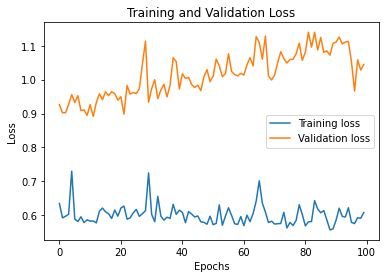

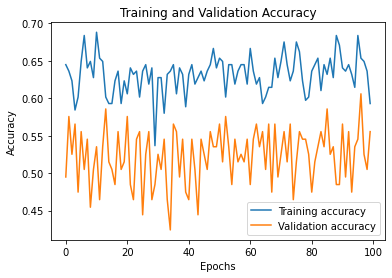

In [45]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy curves
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [71]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print('Training accuracy:', train_acc)
print('Validation accuracy:', val_acc)

Epoch 1/100
8/8 [==============================] - 0s 11ms/step - loss: 0.1340 - accuracy: 0.9697 - val_loss: 0.7438 - val_accuracy: 0.6263
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2479 - accuracy: 0.9437 - val_loss: 0.7287 - val_accuracy: 0.5758
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1294 - accuracy: 0.9524 - val_loss: 0.8179 - val_accuracy: 0.5758
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1194 - accuracy: 0.9740 - val_loss: 1.0250 - val_accuracy: 0.6263
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1316 - accuracy: 0.9740 - val_loss: 1.1026 - val_accuracy: 0.5253
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0966 - accuracy: 0.9870 - val_loss: 0.7533 - val_accuracy: 0.6263
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0777 - accuracy: 0.9784 - val_loss: 0.9697 - val_accuracy: 0.6364
Epoch 8/100
8/8 [=========

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Load dataset
df = pd.read_excel('dataset.xlsx')

df = pd.read_excel("C:/Users/satk8/Desktop/dataset.xlsx",index_col=0)

# Preprocess the text data
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [stemmer.stem(token) for token in tokens]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

df['Search Query'] = df['Search Query'].apply(preprocess)
df['Clicked Result'] = df['Clicked Result'].apply(preprocess)

# Convert gender values to numerical
df['Gender'] = df['Gender'].apply(lambda x: 1 if x.lower() == 'female' else 0)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Search Query'])
X = X.toarray() # convert sparse matrix to dense array
y = df['Gender'].values
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Logistic reg accuracy:', accuracy)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_accuracy = rf.score(X_test, y_test)
print('Random Forest Accuracy:', rf_accuracy)

# Train a Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_accuracy = nb.score(X_test, y_test)
print('Naive Bayes Accuracy:', nb_accuracy)

# Train a SVM model
svm = SVC()
svm.fit(X_train, y_train)
svm_accuracy = svm.score(X_test, y_test)
print('SVM Accuracy:', svm_accuracy)

Logistic reg accuracy: 0.777027027027027
Random Forest Accuracy: 0.7432432432432432
Naive Bayes Accuracy: 0.8040540540540541
SVM Accuracy: 0.7702702702702703


In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV
params = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}

# Train a Naive Bayes model with cross-validation
nb = MultinomialNB()
grid_search = GridSearchCV(nb, params, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy
print('Best alpha:', grid_search.best_params_['alpha'])
print('Accuracy:', grid_search.best_score_)

NameError: name 'MultinomialNB' is not defined

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score

# Load the data
df = pd.read_excel("C:/Users/satk8/Desktop/dataset.xlsx",index_col=0)

# Preprocess the text data
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [stemmer.stem(token) for token in tokens]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

df['Search Query'] = df['Search Query'].apply(preprocess)
df['Clicked Result'] = df['Clicked Result'].apply(preprocess)

# Convert gender values to numerical
df['Gender'] = df['Gender'].apply(lambda x: 1 if x.lower() == 'female' else 0)

# Convert the preprocessed text into numerical data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Search Query'])
X = X.toarray() # convert sparse matrix to dense array
y = df['Gender'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM', 'Neural Network']

# Define the metrics
metrics = ['accuracy', 'precision', 'recall', 'f1_score']

# Define an empty DataFrame to store the results
results_df = pd.DataFrame(columns=metrics, index=models)
clf = LogisticRegression(C=10)
clf.fit(X_train, y_train)
clf_accuracy = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
results_df.loc['Logistic Regression', 'accuracy'] = clf.score(X_test, y_test)
results_df.loc['Logistic Regression', 'precision'] = precision_score(y_test, y_pred)
results_df.loc['Logistic Regression', 'recall'] = recall_score(y_test, y_pred)
results_df.loc['Logistic Regression', 'f1_score'] = f1_score(y_test, y_pred)
print('Logistic reg accuracy:', clf_accuracy)

rf = RandomForestClassifier(max_depth=None, min_samples_split=2,n_jobs=300)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_accuracy = rf.score(X_test, y_test)
results_df.loc['Random Forest', 'accuracy'] = rf.score(X_test, y_test)
results_df.loc['Random Forest', 'precision'] = precision_score(y_test, y_pred)
results_df.loc['Random Forest', 'recall'] = recall_score(y_test, y_pred)
results_df.loc['Random Forest', 'f1_score'] = f1_score(y_test, y_pred)
print('Random Forest Accuracy:', rf_accuracy)

# Train a Naive Bayes model
nb = MultinomialNB(alpha=1)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
nb_accuracy = nb.score(X_test, y_test)
results_df.loc['Naive Bayes', 'accuracy'] = nb.score(X_test, y_test)
results_df.loc['Naive Bayes', 'precision'] = precision_score(y_test, y_pred)
results_df.loc['Naive Bayes', 'recall'] = recall_score(y_test, y_pred)
results_df.loc['Naive Bayes', 'f1_score'] = f1_score(y_test, y_pred)
print('Naive Bayes Accuracy:', nb_accuracy)

# Train a SVM model
svm = SVC(C=10,kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
svm_accuracy = svm.score(X_test, y_test)
results_df.loc['SVM', 'accuracy'] = svm.score(X_test, y_test)
results_df.loc['SVM', 'precision'] = precision_score(y_test, y_pred)
results_df.loc['SVM', 'recall'] = recall_score(y_test, y_pred)
results_df.loc['SVM', 'f1_score'] = f1_score(y_test, y_pred)
print('SVM Accuracy:', svm_accuracy)

# Define the neural network architecture
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
#early_stop = EarlyStopping(monitor='val_loss', patience=30)

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))#, callbacks=[early_stop])
nn_loss, nn_accuracy = model.evaluate(X_test, y_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")
nn_accuracy = accuracy_score(y_test, y_pred)
nn_precision = precision_score(y_test, y_pred)
nn_recall = recall_score(y_test, y_pred)
nn_f1 = f1_score(y_test, y_pred)
results_df.loc['Neural Network', 'accuracy'] = nn_accuracy
results_df.loc['Neural Network', 'precision'] = nn_precision
results_df.loc['Neural Network', 'recall'] = nn_recall
results_df.loc['Neural Network', 'f1_score'] = nn_f1
print("Accuracy: {:.2f}%".format(nn_accuracy * 100))

Logistic reg accuracy: 0.7697368421052632
Random Forest Accuracy: 0.743421052631579
Naive Bayes Accuracy: 0.8026315789473685
SVM Accuracy: 0.7697368421052632
Epoch 1/100
38/38 [==============================] - 1s 8ms/step - loss: 0.6914 - accuracy: 0.5164 - val_loss: 0.6896 - val_accuracy: 0.5395
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5510 - val_loss: 0.6786 - val_accuracy: 0.5395
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.6382 - val_loss: 0.6271 - val_accuracy: 0.6842
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 0.5231 - accuracy: 0.7829 - val_loss: 0.5313 - val_accuracy: 0.7303
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3593 - accuracy: 0.8651 - val_loss: 0.5213 - val_accuracy: 0.7500
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2738 - accuracy: 0.8997 - val_loss: 0.5500 - val_accuracy: 0.7

3/3 [==============================] - 0s 2ms/step


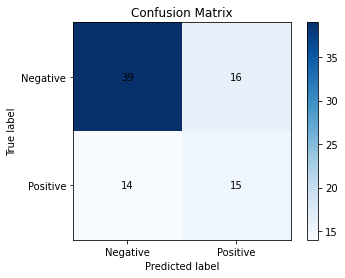

In [89]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype("int32")

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.colorbar()
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center')
plt.show()

In [60]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

3/3 [==============================] - 0s 2ms/step - loss: 1.1286 - accuracy: 0.6905
Accuracy: 69.05%


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression

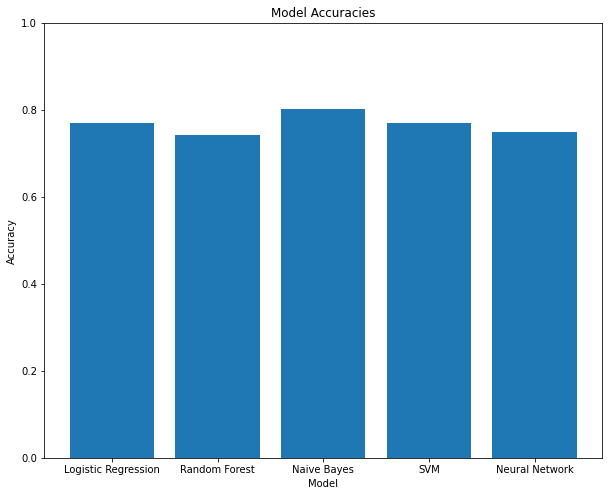

In [5]:
import matplotlib.pyplot as plt
 
# Define the names of the models
models = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM', 'Neural Network']

# Define the accuracies of the models
accuracies = [clf_accuracy, rf_accuracy, nb_accuracy, svm_accuracy, nn_accuracy]
 
# Create the bar chart
fig, ax = plt.subplots(figsize=(10,8))

# Create the bar chart
plt.bar(models, accuracies)
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

# Show the plot
plt.show()

In [4]:
from sklearn.metrics import classification_report

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=30)

# train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stop])
nn_pred = model.predict(X_test)
nn_pred = [1 if x > 0.5 else 0 for x in nn_pred]

# Generate a classification report for the neural network model
nn_report = classification_report(y_test, nn_pred)
print('Neural Network classification report:\n', nn_report)
# Logistic Regression
clf = LogisticRegression(C=10)
clf.fit(X_train, y_train)
clf_accuracy = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
clf_report = classification_report(y_test, y_pred)
print('Logistic Regression classification report:\n', clf_report)

# Random Forest
rf = RandomForestClassifier(max_depth=None, min_samples_split=2,n_jobs=300)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_report = classification_report(y_test, y_pred)
print('Random Forest classification report:\n', rf_report)

# Naive Bayes
nb = MultinomialNB(alpha=1)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
nb_report = classification_report(y_test, y_pred)
print('Naive Bayes classification report:\n', nb_report)

# SVM
svm = SVC(C=10,kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
svm_report = classification_report(y_test, y_pred)
print('SVM classification report:\n', svm_report)

Epoch 1/100
38/38 [==============================] - 1s 6ms/step - loss: 0.6897 - accuracy: 0.5280 - val_loss: 0.6850 - val_accuracy: 0.5395
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.5526 - val_loss: 0.6667 - val_accuracy: 0.5395
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6215 - accuracy: 0.6497 - val_loss: 0.5916 - val_accuracy: 0.7105
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.8257 - val_loss: 0.4700 - val_accuracy: 0.8026
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.8816 - val_loss: 0.4854 - val_accuracy: 0.7829
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2491 - accuracy: 0.8898 - val_loss: 0.4996 - val_accuracy: 0.8158
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2144 - accuracy: 0.9112 - val_loss: 0.5293 - val_accuracy: 0.7697
Epoch 8/100
3

In [12]:
# Naive Bayes hyperparameters to tune
nb_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search cross-validation for Naive Bayes
nb = MultinomialNB()
nb_grid = GridSearchCV(nb, nb_params, cv=5)
nb_grid.fit(X_train, y_train)
nb_accuracy = nb_grid.score(X_test, y_test)
print('Naive Bayes accuracy:', nb_accuracy)
print('Best Naive Bayes hyperparameters:', nb_grid.best_params_)

Naive Bayes accuracy: 0.8026315789473685
Best Naive Bayes hyperparameters: {'alpha': 1}


In [58]:
# Naive Bayes hyperparameters to tune
nb_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search cross-validation for Naive Bayes
nb = MultinomialNB()
nb_grid = GridSearchCV(nb, nb_params, cv=5)
nb_grid.fit(X_train, y_train)
nb_accuracy = nb_grid.score(X_test, y_test)
print('Naive Bayes accuracy:', nb_accuracy)
print('Best Naive Bayes hyperparameters:', nb_grid.best_params_)

# SVM hyperparameters to tune
svm_params = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'poly']}

# Perform grid search cross-validation for SVM
svm = SVC()
svm_grid = GridSearchCV(svm, svm_params, cv=5)
svm_grid.fit(X_train, y_train)
svm_accuracy = svm_grid.score(X_test, y_test)
print('SVM accuracy:', svm_accuracy)
print('Best SVM hyperparameters:', svm_grid.best_params_)

Naive Bayes accuracy: 0.6904761904761905
Best Naive Bayes hyperparameters: {'alpha': 1}
SVM accuracy: 0.7023809523809523
Best SVM hyperparameters: {'C': 10, 'kernel': 'linear'}


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

In [8]:
results_df

,accuracy,precision,recall,f1_score
Logistic Regression,0.769737,0.807018,0.657143,0.724409
Random Forest,0.763158,0.814815,0.628571,0.709677
Naive Bayes,0.802632,0.884615,0.657143,0.754098
SVM,0.769737,0.818182,0.642857,0.72
Neural Network,0.763158,0.736111,0.757143,0.746479


In [14]:
df = pd.read_excel("C:/Users/satk8/Desktop/dataset.xlsx",index_col=0)
df

,Search Query,Clicked Result,Gender
Request ID,,,
1,shoes,Shoe Store,Male
2,clothing,Online Store,Female
3,Makeup tutorial,Video,Female
4,Sports gear,Online Store,Male
5,Haircut near me,Salon,Male
...,...,...,...
756,Mexican Restaurant,Local Eatery,Female
757,Hair Oil,Health and Beauty Store,Female
758,Snowboarding Equipment,Sporting Goods Store,Male


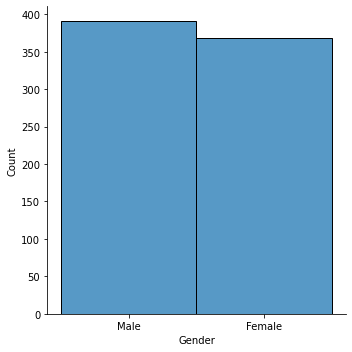

In [15]:
import seaborn as sns
sns.displot(df, x="Gender")

In [13]:
df['Gender'].value_counts()

Male       359
Female     342
 Male       32
 Female     27
Name: Gender, dtype: int64

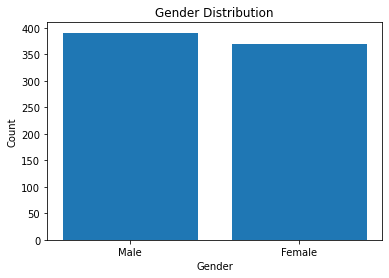

In [16]:
import matplotlib.pyplot as plt
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [13]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import tkinter as tk
from tkinter import *

# load the data
df = pd.read_excel("C:/Users/satk8/Desktop/dataset.xlsx",index_col=0)

# preprocess the text data
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [stemmer.stem(token) for token in tokens]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)
# apply to dataframe
df['Search Query'] = df['Search Query'].apply(preprocess)
df['Clicked Result'] = df['Clicked Result'].apply(preprocess)

# convert gender values to numerical
df['Gender'] = df['Gender'].apply(lambda x: 1 if x.lower() == 'female' else 0)

# convert the preprocessed text into numerical data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Search Query'])
X = X.toarray() # convert sparse matrix to dense array
y = df['Gender'].values

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = MultinomialNB(alpha=1)

# train the model
nb.fit(X_train, y_train)

# define a function to make predictions on user input
def predict_gender(search_query):
    search_query = preprocess(search_query)
    new_data = vectorizer.transform([search_query])
    prediction = nb.predict(new_data)[0]
    if prediction == 1:
        return "female"
    else:
        return "male"

# define the GUI function
def create_gui():
    # create the main window
    root = tk.Tk()
    root.title("Gender Prediction")
    
    # define the labels and entry widgets
    search_query_label = tk.Label(root, text="Enter a search query:")
    search_query_entry = tk.Entry(root, width=50)
    prediction_label = tk.Label(root, text="")
    similar_words_label = tk.Label(root, text="")
    
    # define the predict function
    def predict():
        # get the search query entered by the user
        search_query = search_query_entry.get()

        # preprocess the search query text
        preprocessed_search_query = preprocess(search_query)

        # convert the preprocessed text into numerical data using TfidfVectorizer
        vectorized_search_query = vectorizer.transform([preprocessed_search_query]).toarray()

        # make a prediction using the trained neural network
        prediction = model.predict(vectorized_search_query)[0][0]

        # convert the prediction to a binary label
        binary_prediction = 1 if prediction > 0.5 else 0

        # display the prediction result
        if binary_prediction == 1:
            prediction_label.config(text="The model predicted that the user who searched for '{}' is female ({}%).".format(search_query, round(prediction * 100, 3)))
        else:
            prediction_label.config(text="The model predicted that the user who searched for '{}' is male ({}%).".format(search_query, round((1 - prediction) * 100, 3)))

        # get the similar words from the database
        similar_words = df[df['Search Query'] == search_query]['Clicked Result'].values

        # display the similar words
        similar_words_label.config(text="Similar words: {}".format(', '.join(similar_words)))
    
    # create a predict button
    predict_button = tk.Button(root, text="Predict gender", command=predict)
    predict_button.pack()

    # create a search query label and entry
    search_query_label.pack()
    search_query_entry.pack()

    # create a prediction label
    prediction_label.pack()

    # create a similar words label
    similar_words_label.pack()
    
    # bind the enter key to the predict function
    search_query_entry.bind("<Return>", predict)

    # run the tkinter event loop
    root.mainloop()

if __name__ == "__main__":
    create_gui()

1/1 [==============================] - 0s 16ms/step
